Problem statement.

Recommend a best book based on the ratings.

In [2]:
# importing necessary libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# reading the book data


book = pd.read_csv('book.csv', encoding = "ISO-8859-1")
book.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [4]:
# checking whether there is any navalues: 

book.isna().sum()

Unnamed: 0     0
User.ID        0
Book.Title     0
Book.Rating    0
dtype: int64

In [5]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   User.ID      10000 non-null  int64 
 2   Book.Title   10000 non-null  object
 3   Book.Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 273.5+ KB


In [6]:
# renamning the names of columns for future purposes:


book = book.rename(columns={'Book.Title':'title', 'Book.Rating':'rating', 'User.ID': 'userId'})
book.head()

,Unnamed: 0,userId,title,rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


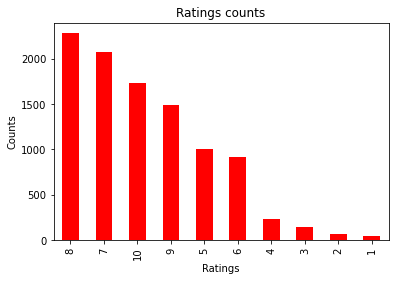

In [7]:
# plotting a graph to check the ratings count:

book['rating'].value_counts().plot(kind='bar', color='red')
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.title('Ratings counts')
plt.show()

In [9]:
book['rating'].unique()

array([ 5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

##### from the bar plot we can see that most rating given to the book is 8

##### now lets check by doing groupby for title with ratings counts that how much rating count is given for each book

In [10]:
combine_book_rating = book.dropna(axis = 0, subset = ['title'])
book_ratingCount = (combine_book_rating.
     groupby(by = ['title'])['rating'].
     count().
     reset_index().
     rename(columns = {'rating': 'totalRatingCount'})
     [['title', 'totalRatingCount']]
    )
book_ratingCount.head()

,title,totalRatingCount
0,"Jason, Madison &amp",1
1,Other Stories;Merril;1985;McClelland &amp,1
2,Repairing PC Drives &amp,1
3,'48,1
4,'O Au No Keia: Voices from Hawai'I's Mahu and ...,1


In [11]:
book_ratingCount.tail()

,title,totalRatingCount
9654,"\Surely You're Joking, Mr. Feynman!\: Adventur...",1
9655,"\Well, there's your problem\: Cartoons",1
9656,iI Paradiso Degli Orchi,1
9657,stardust,1
9658,Ã?Â?bermorgen.,1


##### this totalRatingCount gives the number of ratings given to book like for  Jason, Madison &amp	 the number of ratings given to this book is 1

##### now lets combine this column totalRatingCount to data

In [12]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'title', right_on = 'title', how = 'left')
rating_with_totalRatingCount.head()

,Unnamed: 0,userId,title,rating,totalRatingCount
0,1,276726,Classical Mythology,5,1
1,2,276729,Clara Callan,3,1
2,3,276729,Decision in Normandy,6,1
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8,1
4,5,276737,The Mummies of Urumchi,6,1


In [13]:
rating_with_totalRatingCount.tail()

,Unnamed: 0,userId,title,rating,totalRatingCount
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7,1
9996,9997,162121,Cannibal In Manhattan,9,1
9997,9998,162121,How to Flirt: A Practical Guide,7,1
9998,9999,162121,Twilight,8,1
9999,10000,162129,Kids Say the Darndest Things,6,1


##### now lets take only the books whoose number of rating is more than 1 because if only 1 number rating is given and if that rating the good also it doesn't mean that its a good book, as more number of ratings is given to book then only we can confirm whether it is a good book or not, so lets remove the book whoose totalRatingCount is less than 2.

In [18]:
popularity_threshold = 2
rating_popular_book= rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book

,Unnamed: 0,userId,title,rating,totalRatingCount
5,6,276744,The Kitchen God's Wife,7,2
18,19,276762,The Testament,8,3
27,28,276780,Airframe,7,2
36,37,276798,Lying Awake,5,2
37,38,276798,To Kill a Mockingbird,7,2
...,...,...,...,...,...
9945,9946,162052,Rose,8,2
9948,9949,162052,Leaving Home,1,2
9952,9953,162052,Dave Barry in Cyberspace,8,2
9961,9962,162052,Tomcat in Love,6,2


##### now we have the books which ha atleast 2 ratings, now lets plot a pivot_table with tiltle as index userid as variables so we can confirm that which userid has given rating to book and whats the rating given

In [19]:
# pivot table:

book_features=rating_popular_book.pivot_table(index='title',columns='userId',values='rating').fillna(0)
book_features

userId,19,51,53,82,83,85,86,160,183,190,...,278636,278637,278648,278668,278675,278694,278715,278843,278844,278851
title,,,,,,,,,,,,,,,,,,,,,
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2061: Odyssey Three,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Density of Souls,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
World of Pies : A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wouldn't Take Nothing for My Journey Now,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wuthering Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Now this is table format so lets make it in form of a matrix csr_matrix from scipy.sparse and after that we use NearestNeighbors from sklearn.neighbors to get books that we can recommend

##### in NearestNeighbors we use metric= cosine that so that different books angle  with euclidean distance will be taken cosine

In [20]:
from scipy.sparse import csr_matrix

book_features_matrix = csr_matrix(book_features.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(book_features_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

##### so lets now select a random book so that we can recommend other books with that book using KNN as KNN is a classification model which is used to classify nearest neighbours.

In [21]:
query_index = np.random.choice(book_features.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(book_features.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

149


##### here we give n_neighbors = 6 so that we can get 5 recomended books as 0th number will be the book name

In [22]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(book_features.index[query_index]))
    else:
        print('{0}, with distance of {1}:'.format(book_features.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Privileged Information:

The First Time, with distance of 0.18076807948095952:
How Stella Got Her Groove Back, with distance of 0.3602873455665696:
Range of Motion, with distance of 0.3876984284409579:
The Matarese Countdown, with distance of 0.4207155536365077:
The Golden Compass (His Dark Materials, Book 1), with distance of 0.4438691350186199:


##### here as mentioned  before name of the book is 'Privileged Information', the book that we can recommend with that book is 'The First Time' , as it has  0.18076807948095952 distance with privilegeg information as KNN gives the nearest neighbours, next book is 'How Stella Got Her Groove Back' as it is next nearest book, similarly we can recommend other books